# Проект: Исследование стартапов

## Введение

Проект сделала: Васильева Ирина
Дата 16.06.2025
Финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. Для разработки модели бизнеса нужна информация. Чтобы выработать общее понимание, какие данные могут быть полезны, проводится исследование на исторических данных. Данные неполны.
Цель проекта:
Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv


Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

###  Вывод общей информации, исправление названия столбцов

In [17]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')

df.info()

display(df.describe(include='all'))

display(df.head())

display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
count,9407.000000,9407.000000,9407.000000,1831,9.407000e+03,9378
unique,NaN,NaN,NaN,3,NaN,2627
top,NaN,NaN,NaN,cash,NaN,2008-05-01
freq,NaN,NaN,NaN,1195,NaN,56
mean,5256.981822,49787.284575,71693.030722,NaN,3.932965e+08,NaN
std,3005.794674,69060.422026,73026.433729,NaN,2.682198e+10,NaN
min,1.000000,4.000000,4.000000,NaN,0.000000e+00,NaN
25%,2682.500000,3246.000000,23124.000000,NaN,0.000000e+00,NaN
50%,5178.000000,26107.000000,45126.000000,NaN,0.000000e+00,NaN
75%,7841.500000,56151.000000,81203.000000,NaN,2.343200e+04,NaN


,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
9402,10525,267859,285995,stock,222000000,2013-12-11
9403,10526,285493,286006,NaN,0,2013-12-09
9404,10527,223792,220208,NaN,26000000000,2007-07-03
9405,10528,227620,286176,cash,52400000,2013-12-12
9406,10529,53,92846,NaN,42600000,2013-12-12


В таблице 6 колонок. Названия соответствуют snake-name. 4 колонки int64, 2 колонки object. Пропуски в 2 колонках term_code и
acquired_at.

In [3]:
df_1 = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')

df_1.info()

display(df_1.describe(include='all'))

display(df_1.head())

display(df_1.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
count,217472.000000,217472,143886,217472,109956,3449,147159,95534,108607,217472.000000,...,217472.000000,52928.000000,52928.000000,52680,52928,5.292800e+04,5.292800e+04,52928.000000,52928.000000,52928.000000
unique,NaN,196506,42,4,6156,925,125498,79571,175,NaN,...,NaN,NaN,NaN,3399,9,NaN,NaN,NaN,NaN,NaN
top,NaN,Tyro Payments,software,operating,2010-01-01,2013-06-01,placeshilton.com,Goodman_UK,USA,NaN,...,NaN,NaN,NaN,2008-01-01,venture,NaN,NaN,NaN,NaN,NaN
freq,NaN,15,20759,200486,4570,229,44,20,68089,NaN,...,NaN,NaN,NaN,462,15342,NaN,NaN,NaN,NaN,NaN
mean,145287.383723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.037711,...,0.650442,28962.894536,98490.888433,NaN,NaN,7.946092e+06,3.294525e+05,1.528567,0.604576,0.604538
std,91998.156087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.962712,...,0.826408,16821.871803,88429.084864,NaN,NaN,4.216821e+07,6.531803e+07,2.060192,0.488946,0.488954
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,1.000000,1.000000,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,51960.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,14343.750000,26598.000000,NaN,NaN,2.463300e+05,0.000000e+00,0.000000,0.000000,0.000000
50%,165262.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,28885.500000,58080.000000,NaN,NaN,1.600000e+06,0.000000e+00,1.000000,1.000000,1.000000
75%,228199.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,1.000000,43561.250000,171610.750000,NaN,NaN,6.700000e+06,0.000000e+00,2.000000,1.000000,1.000000


,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
217769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0
217770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0
217771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0
217772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0
217773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,57063.0,284191.0,2013-12-04,venture,7000000.0,0.0,4.0,1.0,1.0


В таблице 22 колонки. float64(12), object(10). 7 колонок без пропусков. Колонки нужно переименовать.

In [4]:
df_1.columns = (
    df_1.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)


display(df_1.head(3))
print(df_1.columns.tolist())


,company__id,name,category__code,status,founded__at,closed__at,domain,network__username,country__code,investment__rounds,...,milestones,funding__round__id,company__id,funded__at,funding__round__type,raised__amount,pre__money__valuation,participants,is__first__round,is__last__round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0


['company__id', 'name', 'category__code', 'status', 'founded__at', 'closed__at', 'domain', 'network__username', 'country__code', 'investment__rounds', 'funding__rounds', 'funding__total', 'milestones', 'funding__round__id', 'company__id', 'funded__at', 'funding__round__type', 'raised__amount', 'pre__money__valuation', 'participants', 'is__first__round', 'is__last__round']


In [5]:
df_1['company__id_merged'] = df_1.iloc[:, 0].combine_first(df_1.iloc[:, 14])
df_1 = df_1.loc[:, ~df_1.columns.duplicated() | (df_1.columns != 'company__id')]
df_1.drop(columns='company__id', errors='ignore', inplace=True)
df_1.rename(columns={'company__id_merged': 'company__id'}, inplace=True)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   name                   217472 non-null  object 
 1   category__code         143886 non-null  object 
 2   status                 217472 non-null  object 
 3   founded__at            109956 non-null  object 
 4   closed__at             3449 non-null    object 
 5   domain                 147159 non-null  object 
 6   network__username      95534 non-null   object 
 7   country__code          108607 non-null  object 
 8   investment__rounds     217472 non-null  float64
 9   funding__rounds        217472 non-null  float64
 10  funding__total         217472 non-null  float64
 11  milestones             217472 non-null  float64
 12  funding__round__id     52928 non-null   float64
 13  funded__at             52680 non-null   object 
 14  funding__round__type   52928 non-nul

In [6]:
new_columns = ['company__id'] + [col for col in df_1.columns if col != 'company__id']

df_1 = df_1[new_columns]
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company__id            217774 non-null  float64
 1   name                   217472 non-null  object 
 2   category__code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded__at            109956 non-null  object 
 5   closed__at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network__username      95534 non-null   object 
 8   country__code          108607 non-null  object 
 9   investment__rounds     217472 non-null  float64
 10  funding__rounds        217472 non-null  float64
 11  funding__total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding__round__id     52928 non-null   float64
 14  funded__at             52680 non-nul

Колонка company_id объединена.

In [7]:
df_2 = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')

df_2.info()

display(df_2.describe(include='all'))

display(df_2.head())

display(df_2.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


,id,first_name,last_name,company_id,network_username
count,226709.000000,226704,226708,34615.000000,38867
unique,NaN,28422,107772,NaN,38421
top,NaN,David,Smith,NaN,iWatchLife
freq,NaN,4495,797,NaN,6
mean,135421.343921,NaN,NaN,83338.840012,NaN
std,79749.283786,NaN,NaN,84316.535268,NaN
min,2.000000,NaN,NaN,1.000000,NaN
25%,63355.000000,NaN,NaN,9771.500000,NaN
50%,138864.000000,NaN,NaN,51837.000000,NaN
75%,206548.000000,NaN,NaN,158522.000000,NaN


,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


,id,first_name,last_name,company_id,network_username
226704,99999,Ramon,Peypoch,NaN,NaN
226705,174088,Dr. Ray,Woods,188200.0,network
226706,118386,Ricardo,Durand,143419.0,itechsocialnet
226707,175827,mahesh,kumar,NaN,socialnethubs
226708,178190,Alex,Smith,NaN,esocialnetlike


В таблице 5 колонок.float64(1), int64(1), object(3). Названия соответсвует snake-name. Пропуски в 2 колонках.

In [8]:
df_3 = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')

df_3.info()
display(df_3.describe(include='all'))

display(df_3.head())

display(df_3.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


,id,person_id,instituition,graduated_at
count,109610.00000,109610.000000,109555,58054
unique,NaN,NaN,21067,71
top,NaN,NaN,Stanford University,2005-01-01
freq,NaN,NaN,2990,2511
mean,54805.50000,152625.077429,NaN,NaN
std,31641.82584,83943.634014,NaN,NaN
min,1.00000,2.000000,NaN,NaN
25%,27403.25000,72994.750000,NaN,NaN
50%,54805.50000,180628.500000,NaN,NaN
75%,82207.75000,227104.750000,NaN,NaN


,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


,id,person_id,instituition,graduated_at
109605,109606,268589,American Institute of Certtified Public Accoun...,NaN
109606,109607,268527,South China University of Technology,NaN
109607,109608,268527,Clarkson University,NaN
109608,109609,268528,Colorado State University,NaN
109609,109610,268528,University of San Diego School of Law,NaN


В таблице 4 колонки. Названия соответсвтуют snake_name. int64(2), object(2). Пропуски в 1 колонке.

In [9]:
df_4 = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')

df_4.info()
display(df_4.describe(include='all'))

display(df_4.head())

display(df_4.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


,id,object_id,degree_type,subject
count,109610.00000,109610,98392,81298
unique,NaN,68451,7148,20050
top,NaN,p:183805,BS,Computer Science
freq,NaN,10,23425,6001
mean,54805.50000,NaN,NaN,NaN
std,31641.82584,NaN,NaN,NaN
min,1.00000,NaN,NaN,NaN
25%,27403.25000,NaN,NaN,NaN
50%,54805.50000,NaN,NaN,NaN
75%,82207.75000,NaN,NaN,NaN


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


,id,object_id,degree_type,subject
109605,109606,p:268589,CPA,NaN
109606,109607,p:268527,MS & BS,Engineering
109607,109608,p:268527,PhD,Engineering
109608,109609,p:268528,B.S.,Electrical Engineering
109609,109610,p:268528,J.D.,NaN


В таблице 4 колонки, в 2 пропуски. int64(1), object(3). Названия соответсвтвуют snake-name.

In [10]:
df_dop1 = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')

df_dop1.info()
display(df_dop1.describe(include='all'))

display(df_dop1.head())

display(df_dop1.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
count,11652.000000,11650,4605,7362,2149,7053,11652.000000,11652.000000,11652.000000
unique,NaN,11648,615,7231,2098,96,NaN,NaN,NaN
top,NaN,KfW Bankengruppe,2000-01-01,morganstanley.com,SVB_Financial,USA,NaN,NaN,NaN
freq,NaN,2,201,5,4,3947,NaN,NaN,NaN
mean,7513.346035,NaN,NaN,NaN,NaN,NaN,5.250515,3.932715,0.210179
std,4445.404028,NaN,NaN,NaN,NaN,NaN,21.292164,14.255757,0.708609
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,3638.750000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,7243.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000
75%,11505.250000,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,0.000000


,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
11647,9997,Axel Johnson,1920-01-01,axeljohnson.com,NaN,USA,1,1,0
11648,9998,Liberty City Ventures,2012-07-01,libertycityventures.com,LCVentures,USA,5,5,0
11649,9999,CalSTRS,1913-07-01,calstrs.com,CalSTRS,USA,1,1,0
11650,11555,Haystack,2013-01-01,network.com::haystack_fund,haystack_fund,NaN,5,5,0
11651,2553,fbFund,NaN,developers.socialnet.com::fbfund.php,fbFund,NaN,23,21,2


In [7]:
df_dop2 = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')

df_dop2.info()
display(df_dop2.describe(include='all'))

display(df_dop2.head())

display(df_dop2.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


,id,funding_round_id,company_id,fund_id
count,61403.000000,61403.000000,61403.000000,61403.000000
mean,30702.000000,22687.272006,64626.998925,2620.820872
std,17725.663627,14895.634423,68795.693962,3169.131407
min,1.000000,1.000000,1.000000,1.000000
25%,15351.500000,10364.500000,18161.500000,262.000000
50%,30702.000000,19844.000000,39715.000000,1312.000000
75%,46052.500000,33325.500000,74961.000000,3769.000000
max,61403.000000,57948.000000,286178.000000,15098.000000


,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


,id,funding_round_id,company_id,fund_id
61398,61399,57926,15847,173
61399,61400,57926,15847,1290
61400,61401,57926,15847,73
61401,61402,57942,70841,15098
61402,61403,57948,211890,2101


###  Смена типов и анализ пропусков

Для первой таблицы сменим тип данных в 1 колонке. Пропуски term_code не требуют обработки. acquired_at

In [11]:
df['acquired_at'] = pd.to_datetime(df['acquired_at'], errors='coerce')
display(df.dtypes)

id                               int64
acquiring_company_id             int64
acquired_company_id              int64
term_code                       object
price_amount                     int64
acquired_at             datetime64[ns]
dtype: object

In [12]:
date_columns = ['founded__at', 'closed__at', 'funded__at']
for col in date_columns:
    df_1[col] = pd.to_datetime(df_1[col], errors='coerce')
int_columns = [
    'participants',
    'is__first__round',
    'is__last__round',
    'investment__rounds',
    'funding__rounds',
    'company__id',
    'funding__round__id'
]

for col in int_columns:
    df_1[col] = df_1[col].astype('Int64')
display(df_1.dtypes)

company__id                       Int64
name                             object
category__code                   object
status                           object
founded__at              datetime64[ns]
closed__at               datetime64[ns]
domain                           object
network__username                object
country__code                    object
investment__rounds                Int64
funding__rounds                   Int64
funding__total                  float64
milestones                      float64
funding__round__id                Int64
funded__at               datetime64[ns]
funding__round__type             object
raised__amount                  float64
pre__money__valuation           float64
participants                      Int64
is__first__round                  Int64
is__last__round                   Int64
dtype: object

Для второй таблицы оптимизирован тип данных

In [13]:
df_2['company_id'] = df_2['company_id'].astype('Int64')

display(df_2.dtypes)

id                   int64
first_name          object
last_name           object
company_id           Int64
network_username    object
dtype: object

In [14]:
df_3['graduated_at'] = pd.to_datetime(df_3['graduated_at'], errors='coerce')


display(df_3.dtypes)

id                       int64
person_id                int64
instituition            object
graduated_at    datetime64[ns]
dtype: object

В df_4 не требуется оптимизация типа данных

In [15]:
dfs = {'df': df, 'df_1': df_1, 'df_2': df_2, 'df_3': df_3, 'df_4': df_4}

for name, data in dfs.items():
    if isinstance(data, pd.DataFrame):
        duplicates_count = data.duplicated().sum()
        print(f'{name}: {duplicates_count} дубликатов')
    else:
        print(f'{name}: не определён или не является DataFrame')

df: 0 дубликатов
df_1: 0 дубликатов
df_2: 0 дубликатов
df_3: 0 дубликатов
df_4: 0 дубликатов


## Шаг 2. Предобработка данных, предварительное исследование


###  Раунды финансирования по годам

Необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составим сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

In [32]:

df_1['funded__at'] = pd.to_datetime(df_1['funded__at'], errors='coerce')

df_1['funded__year'] = df_1['funded__at'].dt.year

pivot = (
    df_1
    .groupby('funded__year')
    .agg(
        typical_raised_amount=('raised__amount', 'median'),
        total_rounds=('raised__amount', 'count')
    )
    .reset_index()
)

pivot = pivot[pivot['total_rounds'] > 50]

display(pivot.sort_values('funded__year'))

,funded__year,typical_raised_amount,total_rounds
15,1999.0,2000000.0,76
16,2000.0,4200000.0,125
17,2001.0,3000000.0,96
18,2002.0,4200000.0,116
19,2003.0,3000000.0,159
20,2004.0,5000000.0,291
21,2005.0,5500000.0,1633
22,2006.0,5000000.0,2436
23,2007.0,3973320.0,3279
24,2008.0,3110000.0,3774


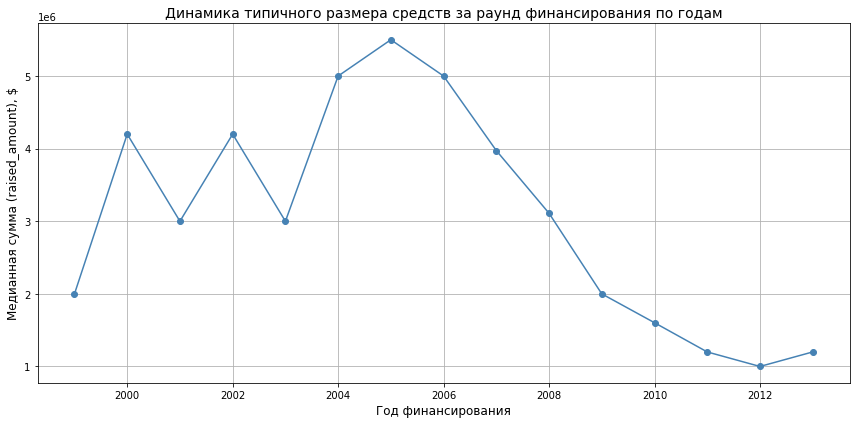

In [33]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))

plt.plot(
    pivot['funded__year'],
    pivot['typical_raised_amount'],
    marker='o',
    linestyle='-',
    color='steelblue'
)

plt.title('Динамика типичного размера средств за раунд финансирования по годам', fontsize=14)
plt.xlabel('Год финансирования', fontsize=12)
plt.ylabel('Медианная сумма (raised_amount), $', fontsize=12)

plt.grid(True)

plt.tight_layout()
plt.show()

В 2005 году сбор средств с одного раунда был максимальным.
В 2013 году самое большое число раундов, сбор средств маленький, немного выше чем в 2012 году.


###  Люди и их образование

- Оценим, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оценим, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [34]:
merged = df_2.merge(df_3, left_on='id', right_on='person_id', how='left')
merged['has_education'] = ~merged['graduated_at'].isna()
edu_stats = (
    merged.groupby('company_id')
    .agg(
        total_employees=('id_x', 'count'),
        no_education=('has_education', lambda x: (~x).sum())
    )
)

edu_stats['no_edu_share'] = edu_stats['no_education'] / edu_stats['total_employees']
bins = [0, 10, 50, 200, float('inf')]
labels = ['до 10', '11-50', '51-200', '200+']

edu_stats['employee_group'] = pd.cut(
    edu_stats['total_employees'], bins=bins, labels=labels, right=True
)
group_result = edu_stats.groupby('employee_group')['no_edu_share'].mean().reset_index()
group_result.rename(columns={'no_edu_share': 'avg_no_edu_share'}, inplace=True)
display(group_result)

,employee_group,avg_no_edu_share
0,до 10,0.580473
1,11-50,0.566830
2,51-200,0.580313
3,200+,0.485035


Разделили все компании на 4 группы по количеству сотрудников. Мелкие (до 10), меньше средниго(11-50), средние(51-200), 
крупные(более 200). По результатам около 50% сотрудников не имеют информации об образовании.


Теоритически объединить с degrees можно бы было, но object_id проблемная колонка. У меня не получилось.


### Объединять или не объединять 

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установим, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оценим, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [45]:
unique_df2 = set(df_2['network_username'].dropna().unique())
unique_dfdop1 = set(df_dop1['network_username'].dropna().unique())

common_usernames = unique_df2.intersection(unique_dfdop1)
print(f"Общее количество уникальных network_username в df_2: {len(unique_df2)}")
print(f"Общее количество уникальных network_username в df_dop1: {len(unique_dfdop1)}")
print(f"Количество общих network_username: {len(common_usernames)}")

print(f"Процент network_username df_2, присутствующих в df_dop1: {len(common_usernames) / len(unique_df2) * 100:.2f}%")
print(f"Процент network_username df_dop1, присутствующих в df_2: {len(common_usernames) / len(unique_dfdop1) * 100:.2f}%")

Общее количество уникальных network_username в df_2: 38421
Общее количество уникальных network_username в df_dop1: 2098
Количество общих network_username: 79
Процент network_username df_2, присутствующих в df_dop1: 0.21%
Процент network_username df_dop1, присутствующих в df_2: 3.77%


Объединять по network_username бессмысленно


###  Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

Приведем данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготов димнные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

In [53]:
company__cols = [
    'company__id', 'name', 'category__code', 'status', 'founded__at', 'closed__at',
    'domain', 'network__username', 'country__code', 'investment__rounds', 'funding__rounds',
    'funding__total', 'milestones'
]

round__cols = [
    'funding__round__id', 'company__id', 'funded__at', 'funding__round__type',
    'raised__amount', 'pre__money__valuation', 'participants', 'is__first__round', 'is__last__round'
]

companies = df_1[company__cols].drop_duplicates(subset=['company__id']).reset_index(drop=True)

rounds = df_1[round__cols].drop_duplicates(subset=['funding__round__id']).reset_index(drop=True)

print(f"Количество уникальных компаний: {companies.shape[0]}")
print(f"Количество уникальных раундов: {rounds.shape[0]}")

print("Компании (companies):")
display(companies.head(5))

print("\nИнформация о таблице companies:")
companies.info()

print("\nРаунды финансирования (rounds):")
display(rounds.head(5))

print("\nИнформация о таблице rounds:")
rounds.info()



Количество уникальных компаний: 196785
Количество уникальных раундов: 52929
Компании (companies):


,company__id,name,category__code,status,founded__at,closed__at,domain,network__username,country__code,investment__rounds,funding__rounds,funding__total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000.0,5.0
1,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0.0,0.0
2,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,0,0.0,4.0
3,10000,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0,0,0.0,0.0
4,10001,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0,0,0.0,0.0



Информация о таблице companies:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196785 entries, 0 to 196784
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   company__id         196785 non-null  Int64         
 1   name                196553 non-null  object        
 2   category__code      123186 non-null  object        
 3   status              196553 non-null  object        
 4   founded__at         91227 non-null   datetime64[ns]
 5   closed__at          2620 non-null    datetime64[ns]
 6   domain              126545 non-null  object        
 7   network__username   80591 non-null   object        
 8   country__code       87990 non-null   object        
 9   investment__rounds  196553 non-null  Int64         
 10  funding__rounds     196553 non-null  Int64         
 11  funding__total      196553 non-null  float64       
 12  milestones          196553 non-null  float64       
d

,funding__round__id,company__id,funded__at,funding__round__type,raised__amount,pre__money__valuation,participants,is__first__round,is__last__round
0,888,1,2005-10-01,series-a,5250000.0,0.0,2,0,1
1,889,1,2007-01-01,series-b,9500000.0,0.0,3,0,0
2,2312,1,2008-05-19,series-c+,25000000.0,0.0,4,1,0
3,<NA>,10,NaT,NaN,NaN,NaN,<NA>,<NA>,<NA>
4,1644,1001,2008-02-26,series-a,5000000.0,0.0,3,1,1



Информация о таблице rounds:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52929 entries, 0 to 52928
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   funding__round__id     52928 non-null  Int64         
 1   company__id            52929 non-null  Int64         
 2   funded__at             52680 non-null  datetime64[ns]
 3   funding__round__type   52928 non-null  object        
 4   raised__amount         52928 non-null  float64       
 5   pre__money__valuation  52928 non-null  float64       
 6   participants           52928 non-null  Int64         
 7   is__first__round       52928 non-null  Int64         
 8   is__last__round        52928 non-null  Int64         
dtypes: Int64(5), datetime64[ns](1), float64(2), object(1)
memory usage: 3.9+ MB


In [54]:
valid_company_ids = rounds['company__id'].dropna().unique()

companies_filtered = companies[companies['company__id'].isin(valid_company_ids)].copy()

print(f"Исходно в companies: {len(companies)} строк")
print(f"После фильтрации: {len(companies_filtered)} строк")

display(companies_filtered.head())
companies_filtered.info()

Исходно в companies: 196785 строк
После фильтрации: 31940 строк


,company__id,name,category__code,status,founded__at,closed__at,domain,network__username,country__code,investment__rounds,funding__rounds,funding__total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000.0,5.0
1,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0.0,0.0
13,1001,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0,1,5000000.0,3.0
18,10014,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0,1,0.0,4.0
19,10015,Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0,5,68069200.0,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 31940 entries, 0 to 196784
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   company__id         31940 non-null  Int64         
 1   name                31708 non-null  object        
 2   category__code      30464 non-null  object        
 3   status              31708 non-null  object        
 4   founded__at         24467 non-null  datetime64[ns]
 5   closed__at          2114 non-null   datetime64[ns]
 6   domain              30172 non-null  object        
 7   network__username   19070 non-null  object        
 8   country__code       29566 non-null  object        
 9   investment__rounds  31708 non-null  Int64         
 10  funding__rounds     31708 non-null  Int64         
 11  funding__total      31708 non-null  float64       
 12  milestones          31708 non-null  float64       
dtypes: Int64(3), datetime64[ns](2), float64(2), o

Создана таблица, где отображены компании, по которым были раунды.


## Шаг 3. Исследовательский анализ объединённых таблиц


###  Объединение данных

Объединим данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмем данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`.

In [16]:
company__cols = [ 
    'company__id', 'name', 'category__code', 'status', 'founded__at', 'closed__at',
    'domain', 'network__username', 'country__code', 'investment__rounds', 'funding__rounds',
    'funding__total', 'milestones'
]

round__cols = [
    'funding__round__id', 'company__id', 'funded__at', 'funding__round__type',
    'raised__amount', 'pre__money__valuation', 'participants', 'is__first__round', 'is__last__round'
]

companies = df_1[company__cols].drop_duplicates(subset=['company__id']).reset_index(drop=True)
rounds = df_1[round__cols].drop_duplicates(subset=['funding__round__id']).reset_index(drop=True)

companies['funding__rounds'] = pd.to_numeric(companies['funding__rounds'], errors='coerce')
companies['investment__rounds'] = pd.to_numeric(companies['investment__rounds'], errors='coerce')
companies['status'] = companies['status'].astype(str).str.lower()

filtered_companies = companies[
    (companies['funding__rounds'] > 0) |
    (companies['investment__rounds'] > 0) |
    (companies['status'] == 'acquired')
].copy()

print(f"Отобрано компаний: {len(filtered_companies):,}")

display(filtered_companies.head())
filtered_companies.info()

Отобрано компаний: 40,747


,company__id,name,category__code,status,founded__at,closed__at,domain,network__username,country__code,investment__rounds,funding__rounds,funding__total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000.0,5.0
1,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0.0,0.0
2,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,0,0.0,4.0
13,1001,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0,1,5000000.0,3.0
18,10014,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0,1,0.0,4.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 196552
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   company__id         40747 non-null  Int64         
 1   name                40747 non-null  object        
 2   category__code      35315 non-null  object        
 3   status              40747 non-null  object        
 4   founded__at         27807 non-null  datetime64[ns]
 5   closed__at          2128 non-null   datetime64[ns]
 6   domain              35754 non-null  object        
 7   network__username   20850 non-null  object        
 8   country__code       34742 non-null  object        
 9   investment__rounds  40747 non-null  Int64         
 10  funding__rounds     40747 non-null  Int64         
 11  funding__total      40747 non-null  float64       
 12  milestones          40747 non-null  float64       
dtypes: Int64(3), datetime64[ns](2), float64(2), o

Создана таблица для дальнейшей аналитики.


###  Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оценим, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

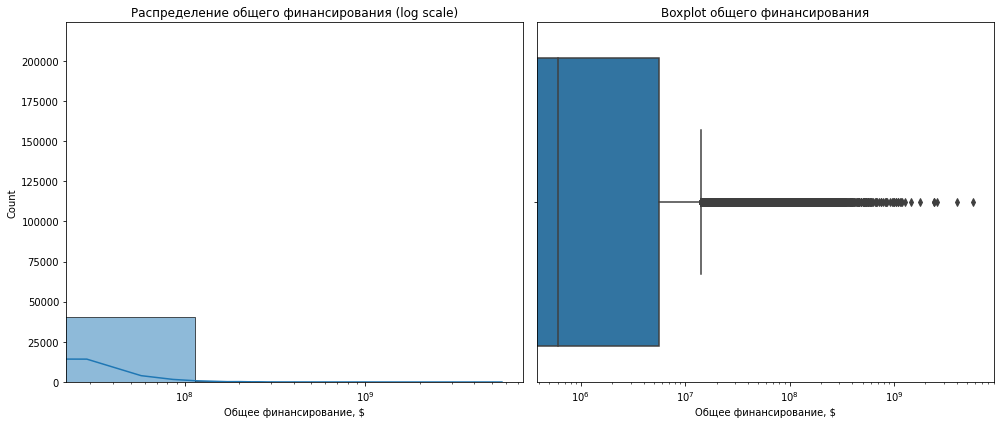

Медиана: 600000
Среднее: 10135610
95-й перцентиль: 43500000


In [18]:
funding_data = filtered_companies['funding__total'].dropna()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(funding_data, bins=50, kde=True)
plt.title('Распределение общего финансирования')
plt.xlabel('Общее финансирование, $')
plt.xscale('log')

plt.subplot(1, 2, 2)
sns.boxplot(x=funding_data)
plt.title('Boxplot общего финансирования')
plt.xlabel('Общее финансирование, $')
plt.xscale('log')

plt.tight_layout()
plt.show()

print("Медиана:", round(funding_data.median()))
print("Среднее:", round(funding_data.mean()))
print("95-й перцентиль:", round(funding_data.quantile(0.95)))


Распределение сильно смещено вправо. Есть значительные выбросы, поэтому медиана и среднее очень отличаются. Наиболее типичное финансирование для компании 600000.

Метод describe показывает базовую статистку числовых столбцов. Он показывает среднее, медиану, стандартное отклонение, миниму, максимум, квартили. Для анализа хорошо подходит медиана и кваритли. Остальные данные искажаются выбросами. Лучше использовать 
графики - гистограмму и "ящик с усами".


### Куплены забесплатно?

- Исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [26]:
acquired_companies = df.merge(
    filtered_companies,
    left_on='acquired_company_id',
    right_on='company__id',
    how='left'
)
suspicious_sales = acquired_companies[
    (acquired_companies['price_amount'].isin([0, 1])) &
    (acquired_companies['funding__total'] > 0)
]
print(f"Найдено подозрительных продаж: {len(suspicious_sales)}")

suspicious_sales_cleaned = suspicious_sales.drop_duplicates(subset=['acquired_company_id'])

print(f"Очищено от дублей, осталось записей: {len(suspicious_sales_cleaned)}")

display(suspicious_sales_cleaned[[
    'acquired_company_id', 'name', 'price_amount', 'funding__total', 'category__code', 'status'
]].sort_values(by='funding__total', ascending=False).head(10))

Найдено подозрительных продаж: 1618
Очищено от дублей, осталось записей: 1593


,acquired_company_id,name,price_amount,funding__total,category__code,status
7208,13219,Clearwire,0,5.700000e+09,mobile,acquired
4662,68409,Fanatics,0,3.950000e+08,ecommerce,acquired
8900,36886,Horizon Wind Energy,0,3.180000e+08,cleantech,acquired
5401,84079,Liberty Dialysis,0,3.149600e+08,health,acquired
4025,36920,"RetailMeNot, Inc.",0,2.995000e+08,web,acquired
814,17511,Good Technology,0,2.657440e+08,mobile,acquired
5043,35251,Landis+Gyr,0,2.650000e+08,cleantech,acquired
5063,39347,Prometheus Laboratories,0,2.600000e+08,biotech,acquired
9015,24346,Solar Power Partners,0,2.530000e+08,cleantech,acquired
7084,1645,KAYAK,0,2.350240e+08,search,acquired


In [28]:
funding = suspicious_sales_cleaned['funding__total'].dropna()

q1 = funding.quantile(0.25)
q3 = funding.quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Q1 (25-й перцентиль): {q1:,.0f}")
print(f"Q3 (75-й перцентиль): {q3:,.0f}")
print(f"IQR (межквартильный размах): {iqr:,.0f}")
print(f"Нижняя граница выбросов: {lower_bound:,.0f}")
print(f"Верхняя граница выбросов: {upper_bound:,.0f}")

Q1 (25-й перцентиль): 2,000,000
Q3 (75-й перцентиль): 15,400,000
IQR (межквартильный размах): 13,400,000
Нижняя граница выбросов: -18,100,000
Верхняя граница выбросов: 35,500,000


Типичный объем финансирования у этих подозрительных компаний от 2 до 15,4 млн. 


###  Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделим категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

In [30]:
acquired_valid = acquired_companies[
    acquired_companies['price_amount'].notna() &
    (acquired_companies['price_amount'] > 0) &
    acquired_companies['category__code'].notna()
]

category_stats = acquired_valid.groupby('category__code').agg(
    count=('price_amount', 'count'),
    median_price=('price_amount', 'median'),
    q75=('price_amount', lambda x: x.quantile(0.75)),
    q25=('price_amount', lambda x: x.quantile(0.25))
).reset_index()

category_stats['iqr_price'] = category_stats['q75'] - category_stats['q25']

category_stats = category_stats[category_stats['count'] > 10]

top_categories = category_stats.sort_values(
    by=['median_price', 'iqr_price'],
    ascending=[False, False]
).head(10)

display(top_categories[['category__code', 'count', 'median_price', 'iqr_price']])



,category__code,count,median_price,iqr_price
16,manufacturing,21,351000000,1240000000
3,biotech,263,200000000,469000000
4,cleantech,39,185000000,278000000
10,finance,20,171500000,541900000
29,security,36,164500000,446250000
6,ecommerce,50,157500000,336537500
26,public_relations,74,110000000,389375000
22,network_hosting,64,102500000,324775000
30,semiconductor,71,100000000,248070000
28,search,19,90000000,188500000


Выделены топ-10 компаний-стартапов по направлению. Отображено количество сделок, медиана стоимости, IQR разброс.
Топ-10 это оптимальное количество, наглядно и отображает разнообразие.


###  Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуем значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Построим график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы.

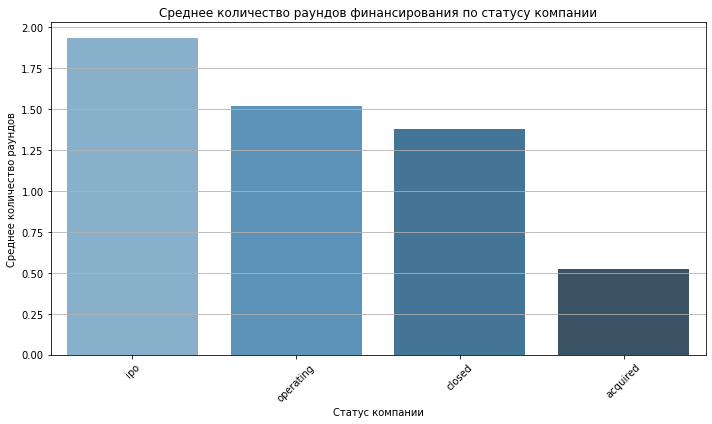

In [31]:
status_funding_stats = (
    filtered_companies[filtered_companies['funding__rounds'].notna()]
    .groupby('status')['funding__rounds']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=status_funding_stats,
    x='status',
    y='funding__rounds',
    palette='Blues_d'
)
plt.title('Среднее количество раундов финансирования по статусу компании')
plt.xlabel('Статус компании')
plt.ylabel('Среднее количество раундов')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Проанализировано количество раундов финансирования в зависимоти от статуса компании. У IPO около 2 раундов в среднем, у operating 1,5. У closed 1,3. У acquired 0.5. У компаний вышедших на IPO больше финансирования инвестеров.


##  Итоговый вывод и рекомендации

По итогу аналитики данных.  Наиболее типичное финансирование для компании 600000. Выделены 1593 подозрительные компании,
которые получали финансирование, но были проданы "бесплатно", по ним следует изучить дополнительные данные.
Выделены топ-10 компаний-стартапов по направлению, основыне это biotech, public-relations, semiconductor.
Проанализировано количество раундов финансирования в зависимоти от статуса компании. У IPO около 2 раундов в среднем, у operating 1,5. У closed 1,3. У acquired 0.5.Рекомендовано финансирование стартапов из топ-10 по направлению, в размере около 600000.